In [1]:

import csv
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import numpy as np

In [2]:

task_data = pd.read_csv('all_beagle.csv',names=['run','tool','task_id','start','end','filename','file','success','library','platform','sizes','read_len','duration'])
job_data = pd.read_csv('output.csv',names=['run','tool','task_id','start','end','filename','file','success','library','platform','sizes','read_len','duration'])

In [3]:
files = job_data.file.unique()
runs=task_data.run.unique()

# Profiled tools
Belowo are the tools we have attempted to profile. Extracting data for ConcatVcf is in progress.

In [4]:
tools = task_data.tool.unique()
for n in tools:
    print(n)

BwaMem
IndexBam
PicardMarkDuplicates
Mutect
ConcatVcf
Strelka
RgMergeSort
ContigMergeSort
SamtoolsFlagstat


In [5]:
success = (task_data.success==True)


# Task-wise Summary Statistics

In [6]:
temp = ''
for n in tools:
    correct = task_data.tool==n
    temp = task_data[success & correct]
    print(n,temp.duration.describe())

('BwaMem', count      4352.000000
mean      59697.297941
std       47179.371722
min        1292.983000
25%       24582.189000
50%       51508.909500
75%       76634.140750
max      272378.470000
Name: duration, dtype: float64)
('IndexBam', count    182155.000000
mean       1787.423868
std       15081.776300
min           0.114000
25%          18.646000
50%          67.183000
75%         405.915500
max      217731.811000
Name: duration, dtype: float64)
('PicardMarkDuplicates', count    182155.000000
mean       2815.476639
std        4587.546064
min           0.142000
25%         437.249500
50%        1604.442000
75%        3225.346500
max      135568.933000
Name: duration, dtype: float64)
('Mutect', count    427428.000000
mean       2815.724617
std        4457.016730
min           0.157000
25%         904.882250
50%        2309.999500
75%        3446.415000
max      246075.579000
Name: duration, dtype: float64)
('ConcatVcf', count     3348.000000
mean      9007.598277
std      11770.160

# Job-wise summary statistics

In [7]:
temp = ''
for n in tools:
    correct = job_data.tool==n
    temp = job_data[success & correct]
    print(n,temp.duration.describe())

/Users/mattebaughman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


('BwaMem', count      1887.000000
mean     121323.706654
std      101274.007150
min        4891.765000
25%       47517.099500
50%       98286.177000
75%      169787.102000
max      920397.563000
Name: duration, dtype: float64)
('IndexBam', count    1.894000e+03
mean     1.690656e+05
std      1.129957e+06
min      6.916960e+02
25%      4.440049e+03
50%      1.001654e+04
75%      5.889917e+04
max      1.537693e+07
Name: duration, dtype: float64)
('PicardMarkDuplicates', count    1.894000e+03
mean     2.640543e+05
std      2.915157e+05
min      4.018437e+03
25%      9.980727e+04
50%      1.976150e+05
75%      3.071582e+05
max      2.583084e+06
Name: duration, dtype: float64)
('Mutect', count    9.860000e+02
mean     1.184749e+06
std      1.132955e+06
min      7.107651e+04
25%      5.932253e+05
50%      1.012997e+06
75%      1.457025e+06
max      1.309130e+07
Name: duration, dtype: float64)
('ConcatVcf', count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%     

# Log-scaled histograms of task durations by tool


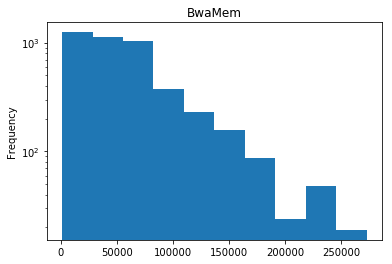

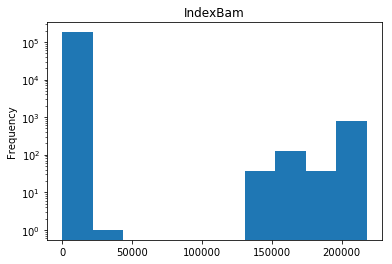

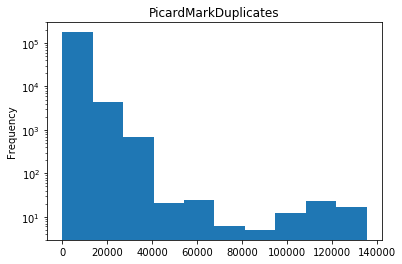

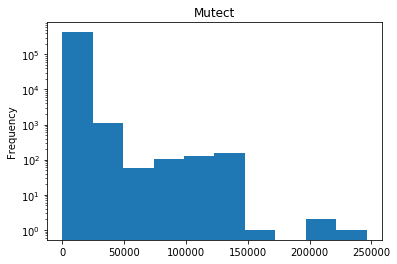

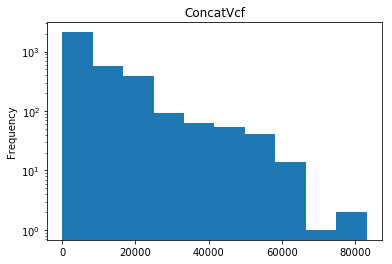

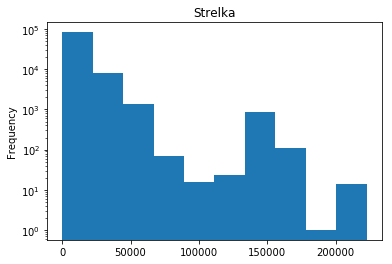

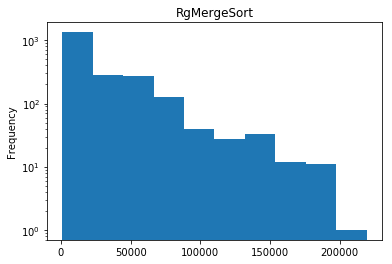

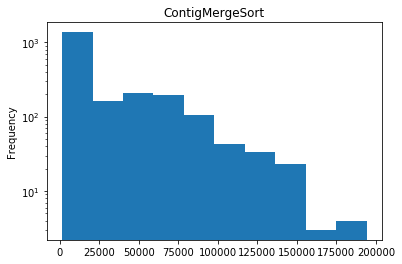

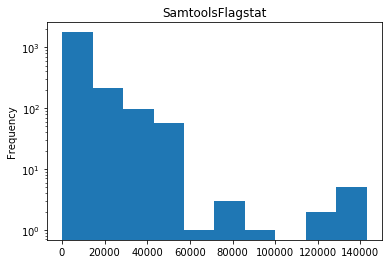

In [8]:
for k in tools:
    correct = task_data[task_data.tool == k]
    correct = correct[correct.success==True]
    plt.figure()
    
    correct.duration.plot(kind='hist',title=k,logy=True)
    

# log-scaled histograms of job durations by tool

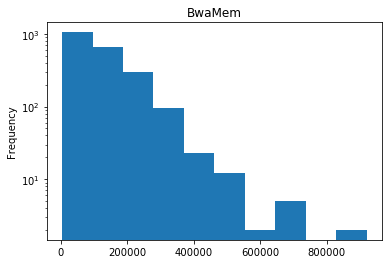

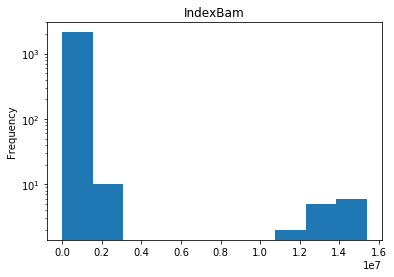

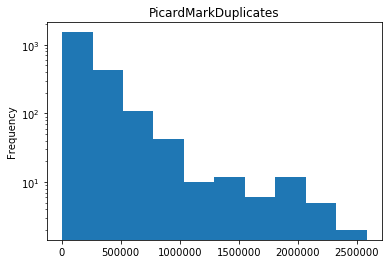

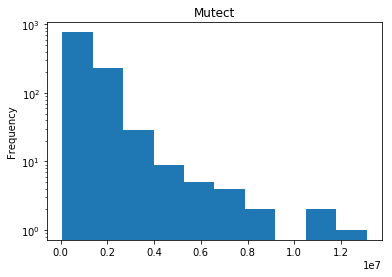

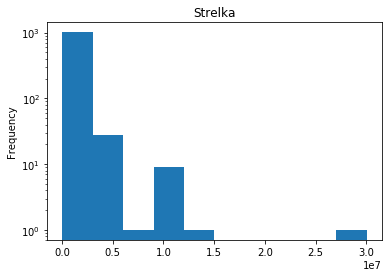

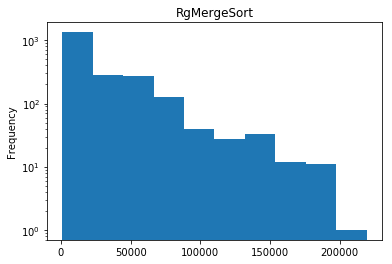

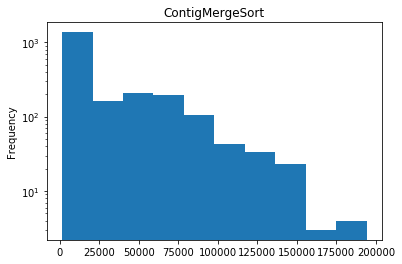

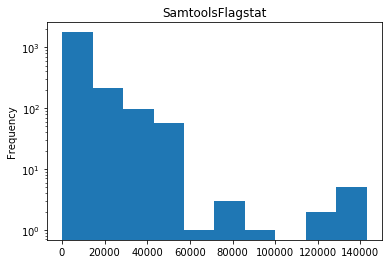

In [9]:
for k in tools:
    correct = job_data[job_data.tool == k]
    if len(correct.duration.tolist())>0:
        plt.figure()
    
        correct.duration.plot(kind='hist',title=k,logy=True)
    

# Task Duration vs. File size by tool

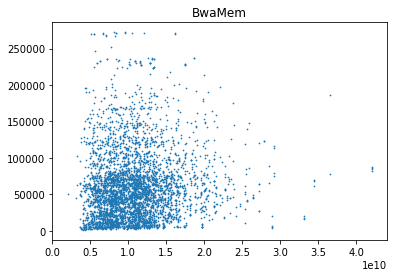

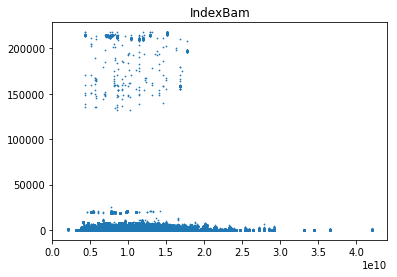

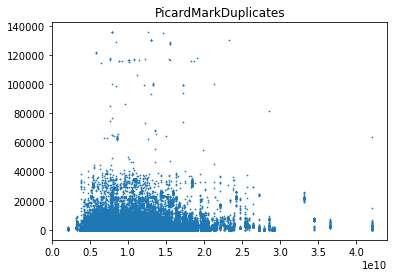

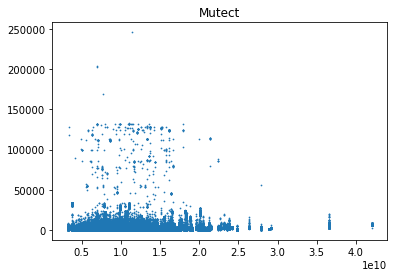

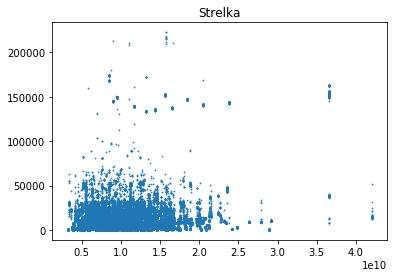

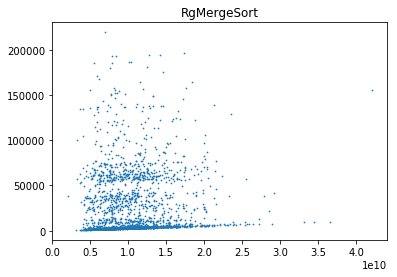

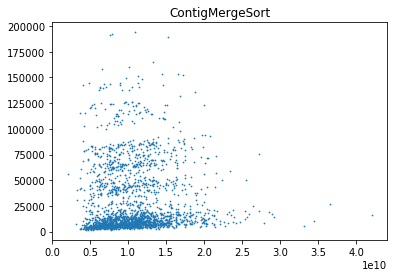

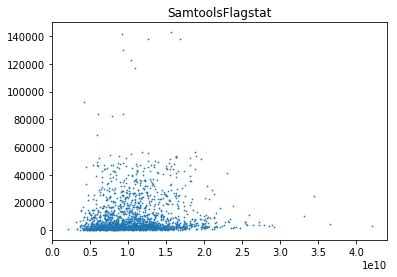

In [10]:
for k in tools:
    correct = task_data[task_data.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)
   

# Job duration vs. file size by tool

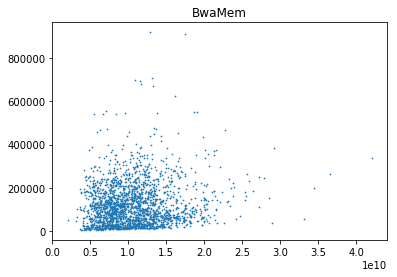

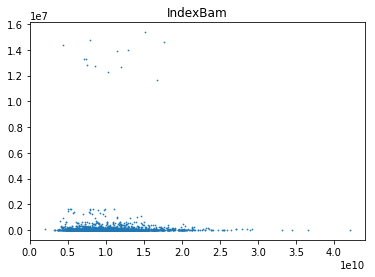

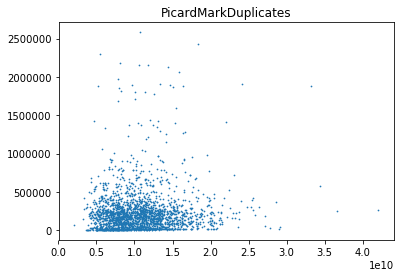

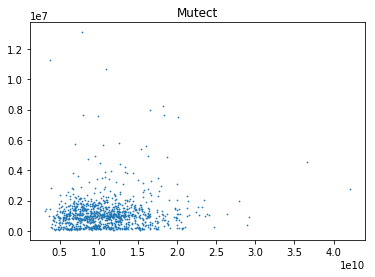

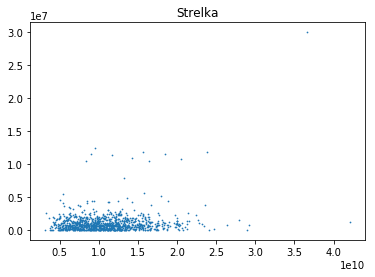

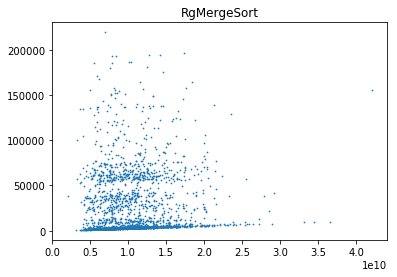

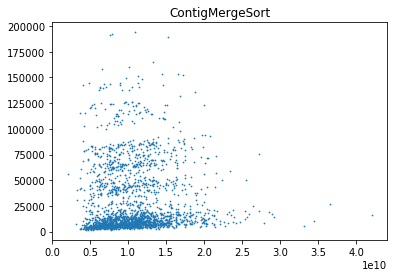

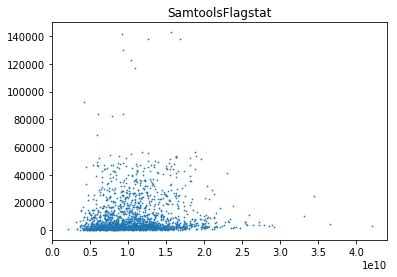

In [11]:
for k in tools:
    correct = job_data[job_data.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)
   

# Box plots of task durations by tool

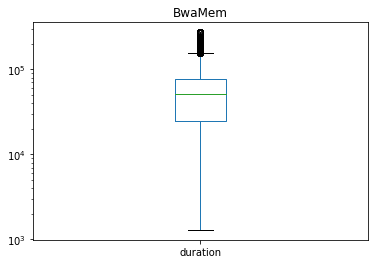

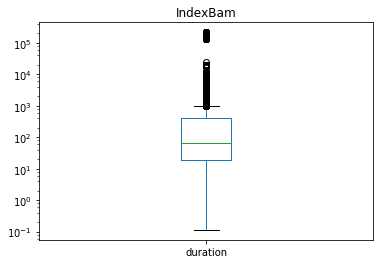

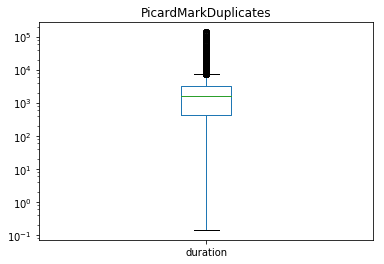

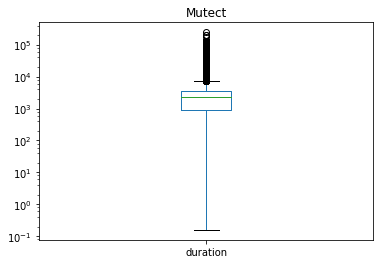

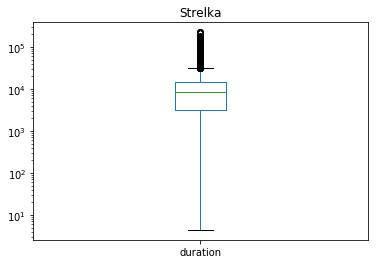

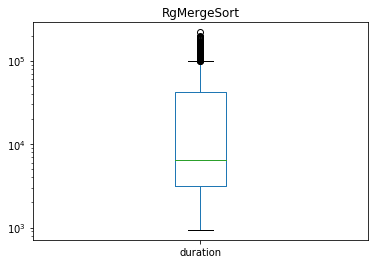

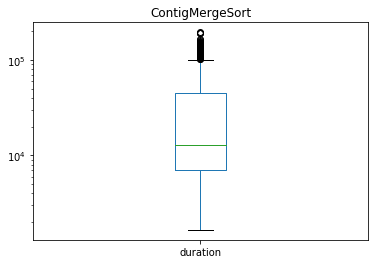

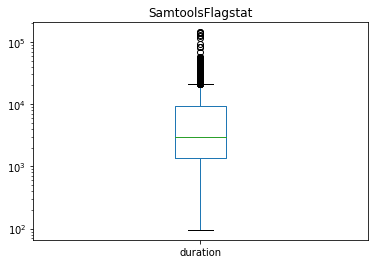

In [12]:
for p in tools:
    correct2=task_data[task_data.tool==p].dropna(axis=0,how='any')
    correct2 = correct2[correct2.success==True]
    
    if correct2.duration.size != 0:
        plt.figure()
        correct2.duration.plot(kind='box',logy=True,title=p)

# Box plots of job durations by tool


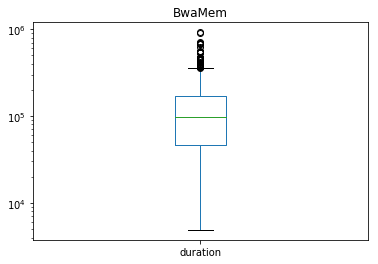

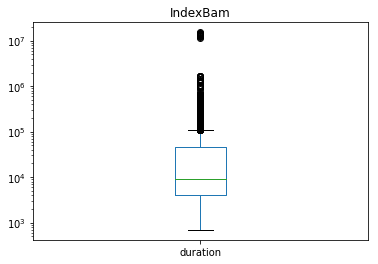

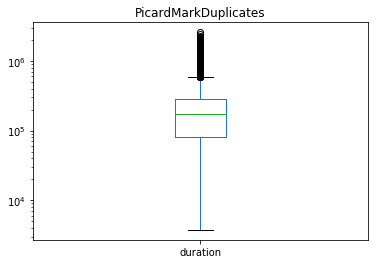

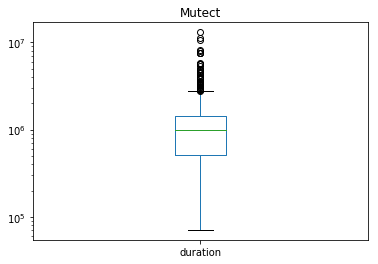

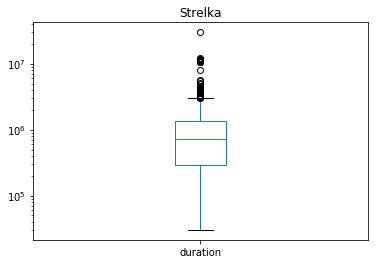

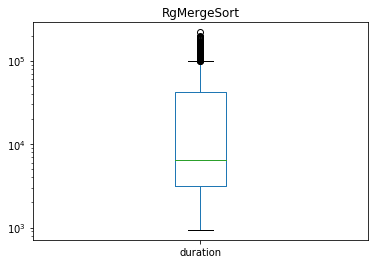

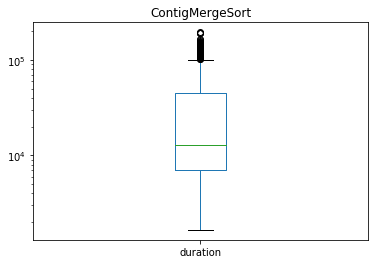

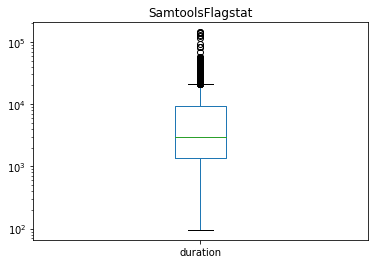

In [13]:
for p in tools:
    correct2=job_data[job_data.tool==p].dropna(axis=0,how='any')
    
    if correct2.duration.size != 0:
        plt.figure()
        correct2.duration.plot(kind='box',logy=True,title=p)

# Task duration vs. file size by tool, outliers removed

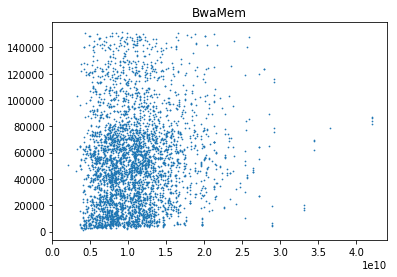

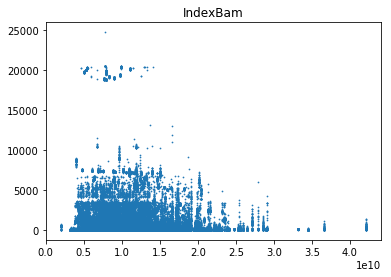

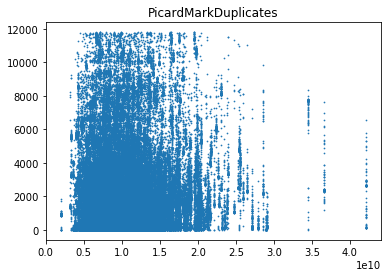

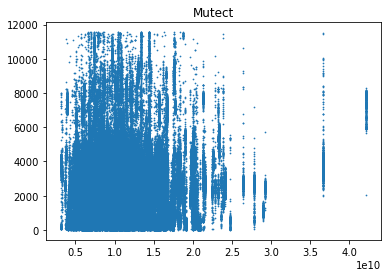

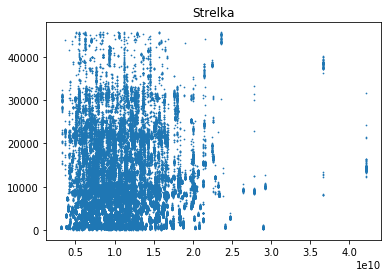

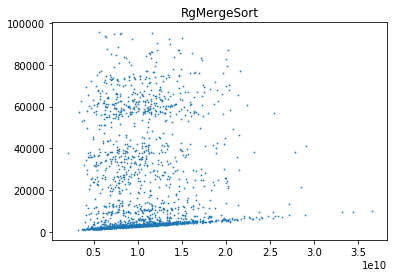

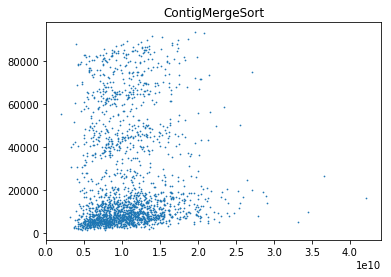

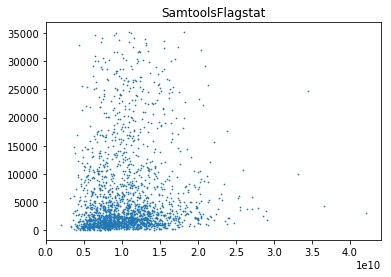

In [14]:
for k in tools:
    correct = task_data[task_data.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    correct = correct[np.abs(correct.duration-correct.duration.mean())<=(1.96*correct.duration.std())]
    
    '''
    print(len(correct))
    for p in correct:
        print(correct)
    '''
    #print(len(correct.size.tolist()),len(correct.duration))
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)

# Job durations vs file size by tool, outliers removed

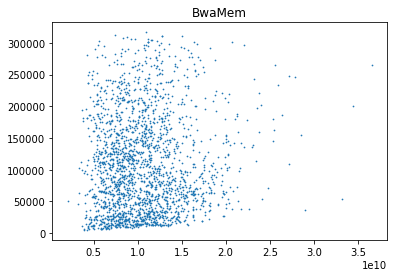

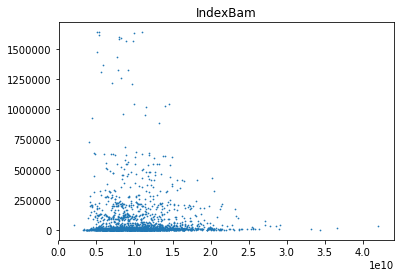

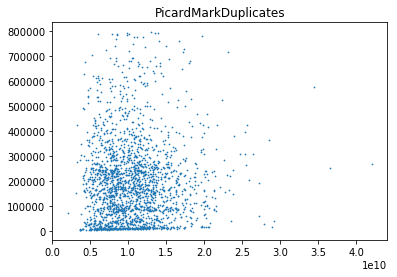

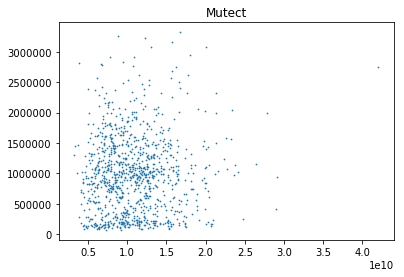

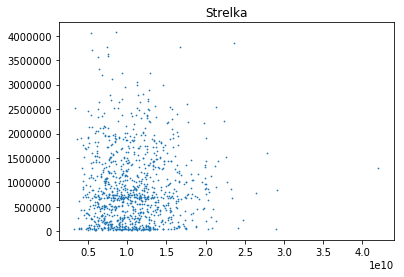

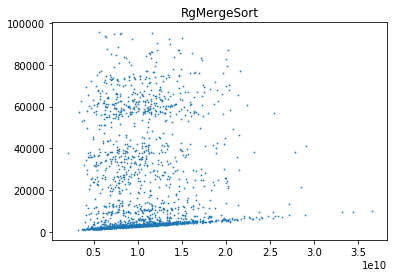

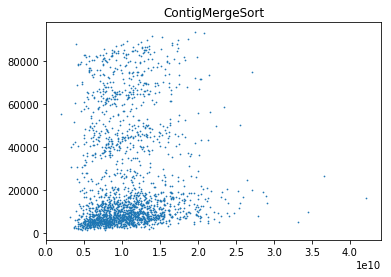

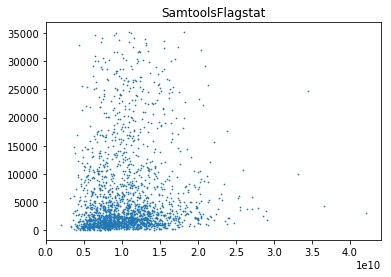

In [15]:
for k in tools:
    correct = job_data[job_data.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    correct = correct[np.abs(correct.duration-correct.duration.mean())<=(1.96*correct.duration.std())]
    
    '''
    print(len(correct))
    for p in correct:
        print(correct)
    '''
    #print(len(correct.size.tolist()),len(correct.duration))
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)

# Task duration vs file size by tool, outliers removed, equal scaling

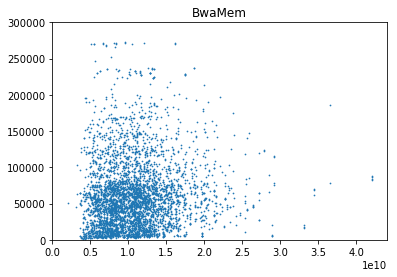

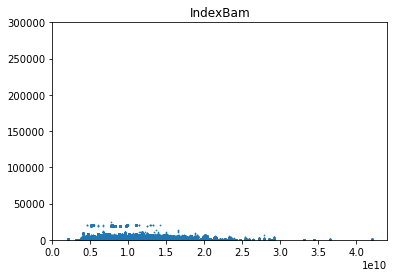

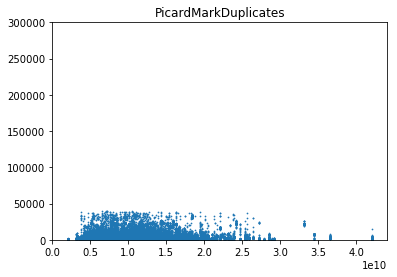

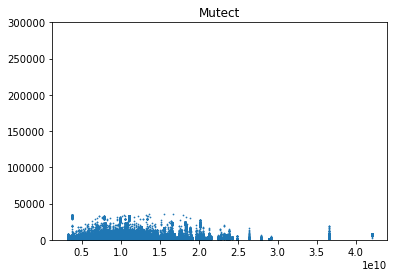

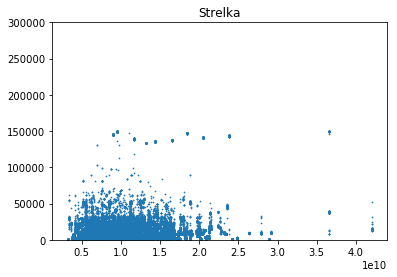

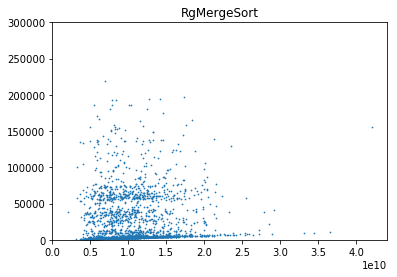

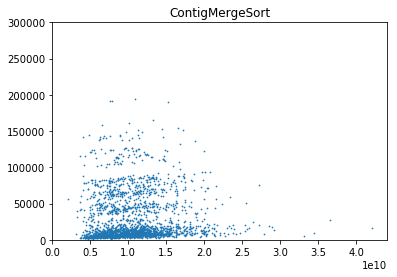

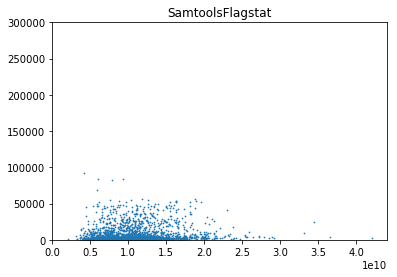

In [16]:
for k in tools:
    correct1 = task_data[task_data.tool==k].dropna(axis=0,how='any')
    correct1 = correct1[correct1.success==True]
    correct1 = correct1[np.abs(correct1.duration-correct1.duration.mean())<=(8*correct1.duration.std())]
    
    '''
    print(len(correct))
    for p in correct:
        print(correct)
    '''
    #print(len(correct.size.tolist()),len(correct.duration))
    if correct1.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct1.sizes,correct1.duration,s=.5)
        plt.ylim(0,300000)
        plt.xlim()

# job durations vs file size by tool, outliers removed, log scaling

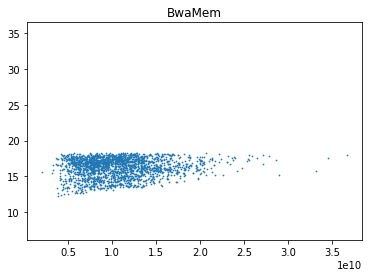

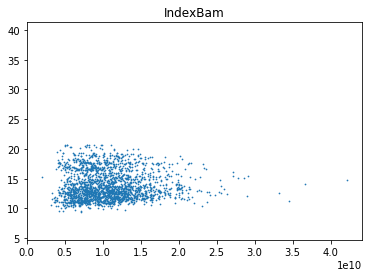

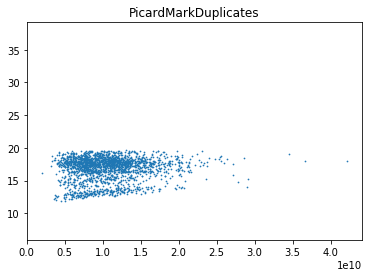

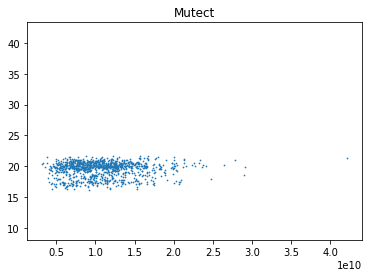

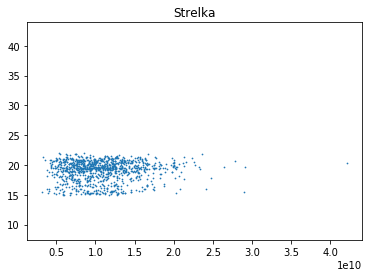

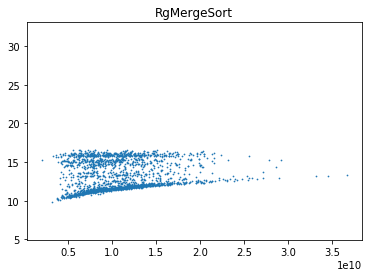

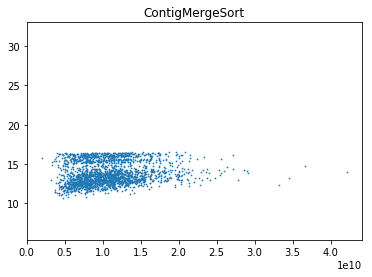

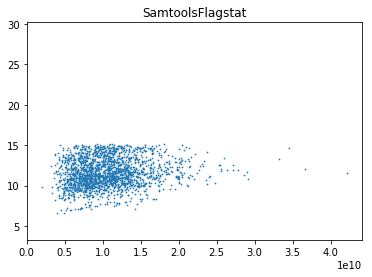

In [17]:
for k in tools:
    correct1 = job_data[job_data.tool==k].dropna(axis=0,how='any')
    correct1 = correct1[correct1.success==True]
    correct1 = correct1[np.abs(correct1.duration-correct1.duration.mean())<=(1.96*correct1.duration.std())]
    
    '''
    print(len(correct))
    for p in correct:
        print(correct)
    '''
    #print(len(correct.size.tolist()),len(correct.duration))
    if correct1.duration.size!=0:
        plt.figure()
        plt.title(k)
        
        plt.scatter(correct1.sizes,np.log2(correct1.duration),s=.5)
        
        plt.ylim(.5*min(np.log2(correct1.duration)),2*max(np.log2(correct1.duration)))
        plt.xlim()

# task duration vs file size by tool, color-coded by run

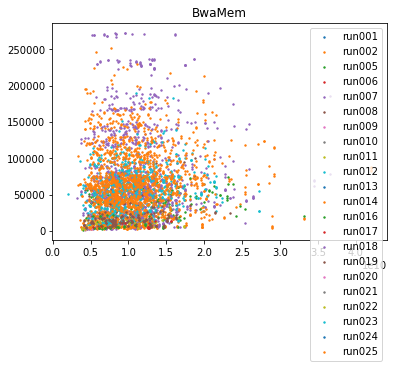

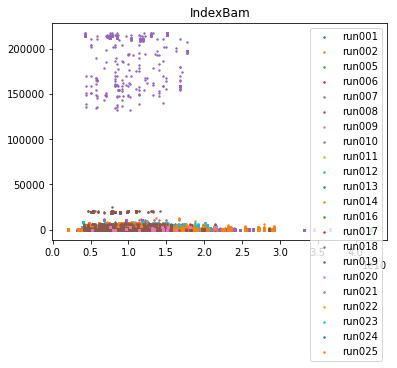

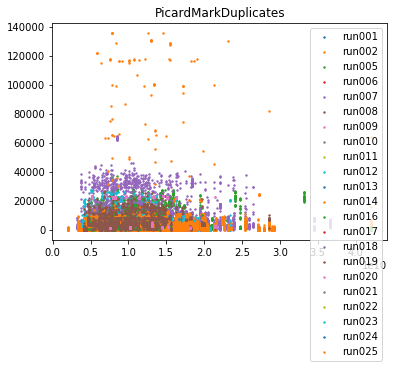

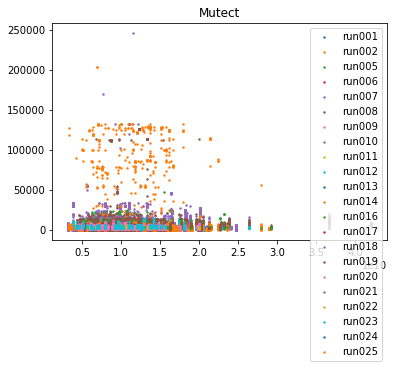

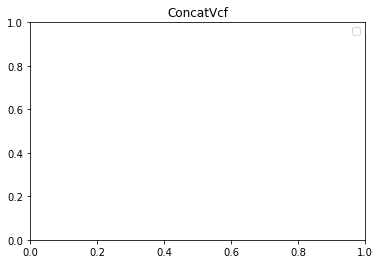

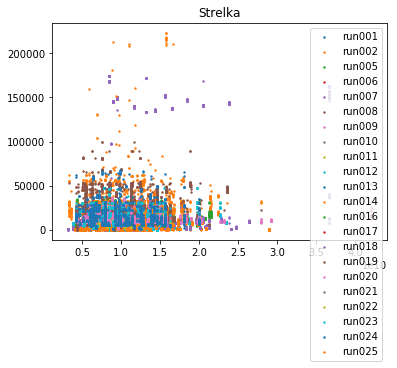

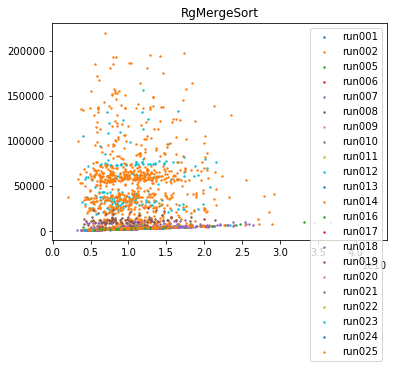

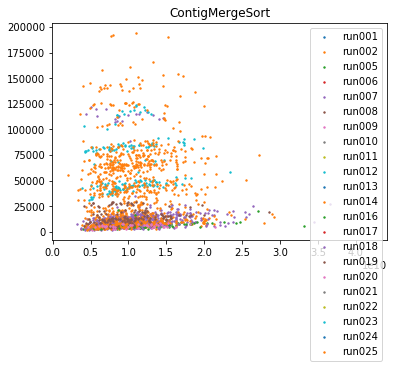

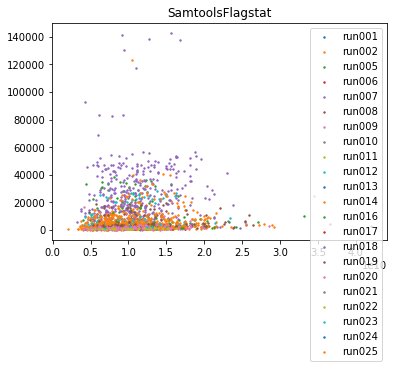

In [18]:

for n in tools:
    plt.figure()
    plt.title(n)
    temp=task_data[task_data.tool==n].dropna(axis=0,how='any')
    temp=temp[temp.success==True]
    if len(temp.duration.tolist())>0:
        for k in runs:
            run_temp=temp[temp.run==k]
            plt.scatter(x=run_temp.sizes,y=run_temp.duration,s=2)
    plt.legend(runs)
            
    

# run007, task duration vs file size
used to identify run007 as potentially problematic, at least for 'indexbam' tool

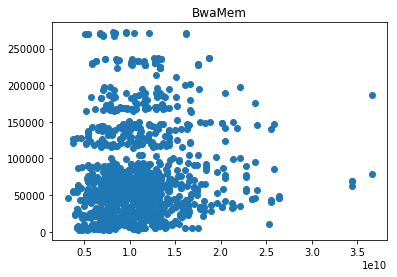

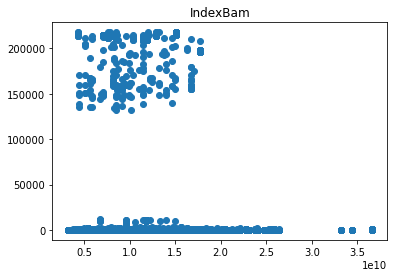

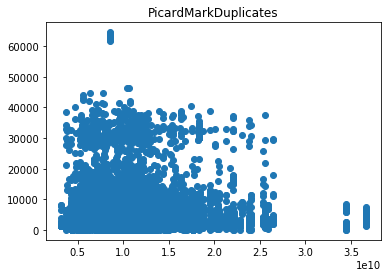

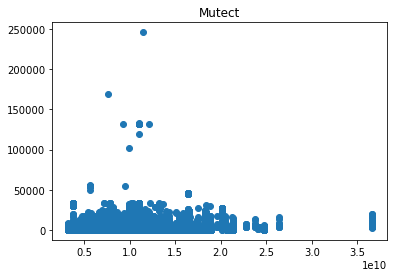

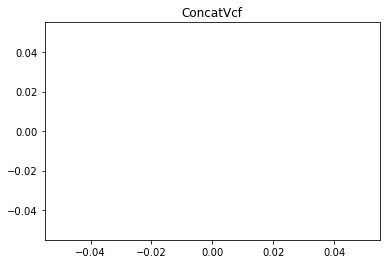

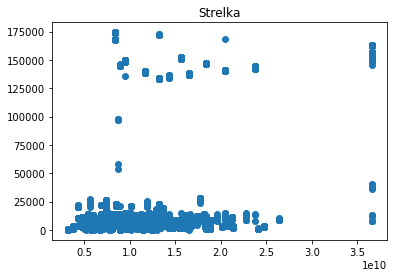

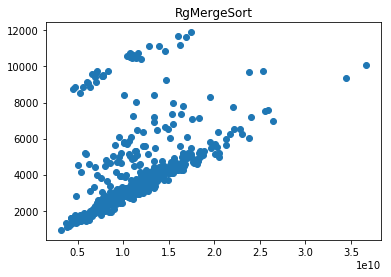

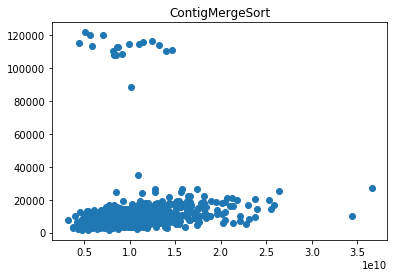

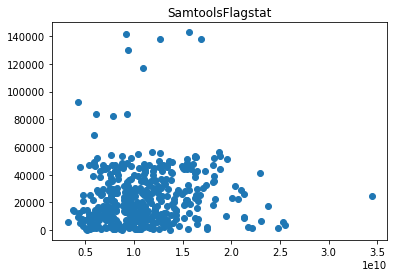

In [19]:

for n in tools:
    plt.figure()
    plt.title(n)
    temp=task_data[task_data.tool==n].dropna(axis=0,how='any')
    temp=temp[temp.success==True]
    temp=temp[temp.run=='run007']
         
    plt.scatter(x=temp.sizes,y=temp.duration)
    

# Aggregate Workflows

In [20]:
temp = job_data
results=df(index=files,columns=tools)

results=results.drop(['ConcatVcf'],axis=1)

for n in files:
    if n!='ConcatVcf':
        for k in tools:
            to_search = temp[temp.file==n].dropna(axis=0,how='any')
            to_search = to_search[to_search.tool==k]
            if len(to_search.duration.tolist())==1:
                if len(to_search.sizes.tolist())==1:
                    results.loc[n,k]=[to_search.sizes.tolist()[0],to_search.duration.tolist()[0]]

In [21]:
'''
results.to_csv('results.csv')
print(results)
'''

"\nresults.to_csv('results.csv')\nprint(results)\n"

In [22]:
sizes_df=df(columns=['Sizes','Sums'])
results=results.dropna(axis=0,how='any')
#print(results)

In [23]:
final=results.join(sizes_df)
#final.to_csv('final.csv')
#print(tools)

In [24]:
parsed_files=final.index.values
parsed_tools=final.columns.values
for k in parsed_files:
    final.loc[k,'Sizes']=final.loc[k,tools[0]][0]


    file_dur=0
    for p in tools:
        if p != 'ConcatVcf':
            #print(p,final.loc[k,p])
            file_dur+=final.loc[k,p][1]
            #final.loc[k,p]=final.loc[k,p]
    final.loc[k,'Sums']=file_dur
    #print(file_dur)
 

In [25]:
#final.to_csv('final1.csv')

# workflow duration (sums) vs input size

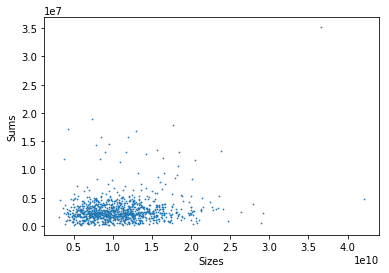

In [26]:
plt.figure()
final.plot.scatter(x='Sizes',y='Sums',s=0.5)

# workflow duration vs input size, outliers removed, equal log-scaling

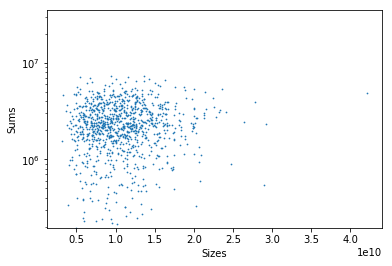

In [27]:
trimmed_final = final[np.abs(final.Sums-final.Sums.mean())<=(1.96*final.Sums.std())]
trimmed_final.plot(kind='scatter',x='Sizes',y='Sums',s=0.5,ylim=[0,35000000],logy=True)

# filter tasks by number of tasks in BwaMem job
In order to potentially identify inconsistencies in the launcing of swift processes, we filter the tasks to include only those that are part of successful workflows wherein the BwaMem tool possessed only two swift processes. We then plot these tasks (duration vs input) by tool.

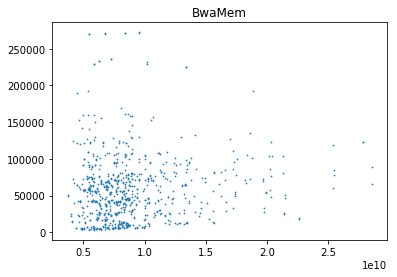

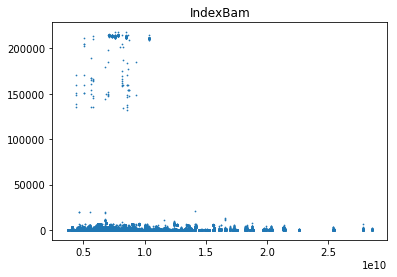

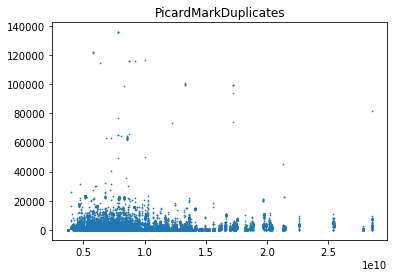

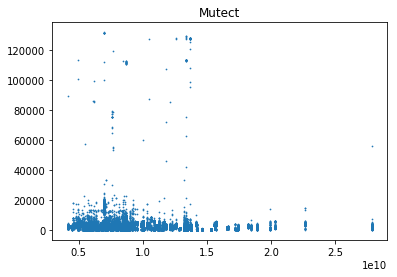

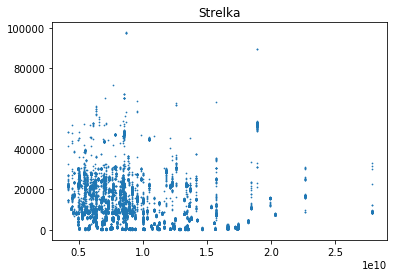

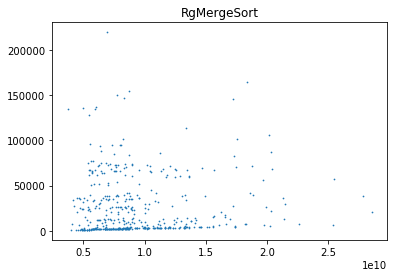

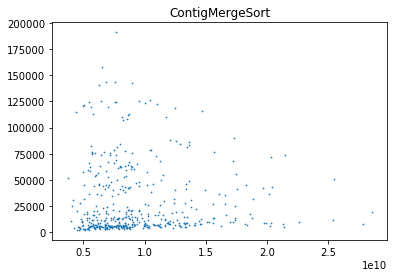

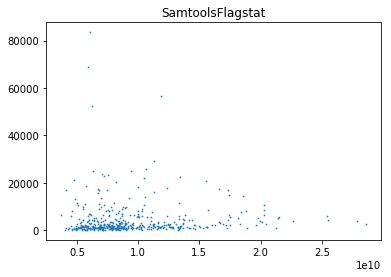

In [28]:
tmpdf = task_data[task_data.tool=='BwaMem'].groupby(['tool', 'file']).size().reset_index(name='counts')
normal_tasks = tmpdf[tmpdf.counts == 2]
normal_tasks.file
bwamem_2 = task_data[task_data['file'].isin(normal_tasks.file)]
for k in tools:
    correct = bwamem_2[bwamem_2.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)
    

# repeat of above process for jobs rather than tasks

In [29]:
bwamem_2_job = job_data[job_data['file'].isin(normal_tasks.file)]

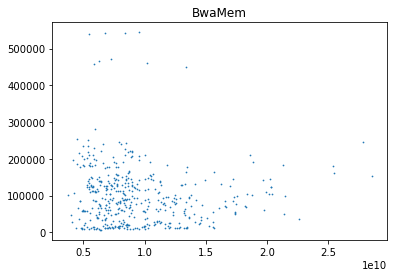

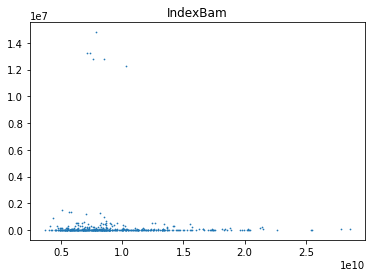

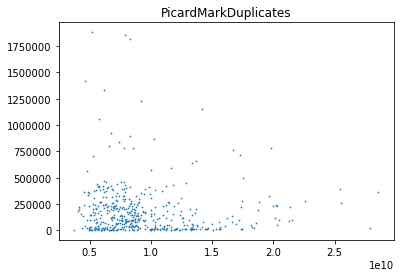

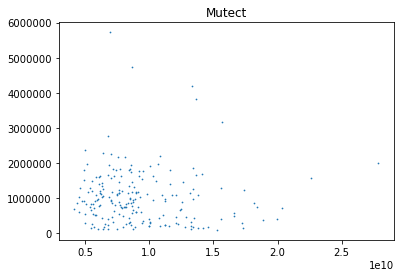

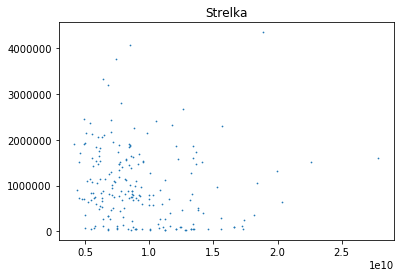

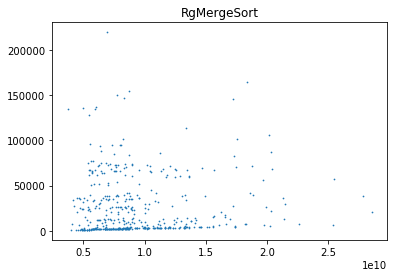

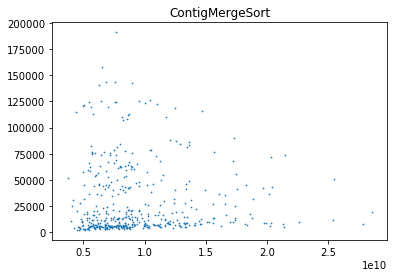

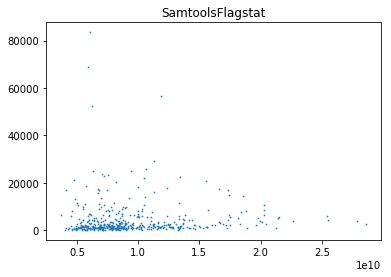

In [30]:
for k in tools:
    correct = bwamem_2_job[bwamem_2_job.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)

# begin analysis of effect of concurrent tasks
(In Progress)

In [31]:
con_data=task_data
con_data=con_data.dropna(axis=0,how='any')
con_data=con_data[con_data.success==True]
tasker = df(index=con_data.file.tolist(),columns=['con_tasks','cpu_tasks','mem_tasks','I/O_tasks'])
con_data=con_data.join(tasker)

In [32]:
#print(len(con_data.duration.tolist()))
#print(con_data.columns.values)

In [33]:
tasks=con_data.task_id.unique().tolist()

In [34]:
'''
from multiprocessing import Pool
def parsr(k):
    temp = con_data[con_data.task_id==k]
    if len(temp.duration.tolist())>0:
        temp_start = temp.start.tolist()[0]
        temp_stop = temp.end.tolist()[0]
        temp_cons = task_data[task_data.start>=temp_start]
        temp_cons1= task_data[task_data.end<=temp_stop]
        temp_cons = temp_cons.append(temp_cons1)
        temp_cons = temp_cons.drop_duplicates()
        con_data.loc[k,'con_tasks']=temp_cons.task_id.size
p = Pool(processes=4)
p.map(parsr,tasks)
'''

"\nfrom multiprocessing import Pool\ndef parsr(k):\n    temp = con_data[con_data.task_id==k]\n    if len(temp.duration.tolist())>0:\n        temp_start = temp.start.tolist()[0]\n        temp_stop = temp.end.tolist()[0]\n        temp_cons = task_data[task_data.start>=temp_start]\n        temp_cons1= task_data[task_data.end<=temp_stop]\n        temp_cons = temp_cons.append(temp_cons1)\n        temp_cons = temp_cons.drop_duplicates()\n        con_data.loc[k,'con_tasks']=temp_cons.task_id.size\np = Pool(processes=4)\np.map(parsr,tasks)\n"

# retaining only lowest percentage or minimum values


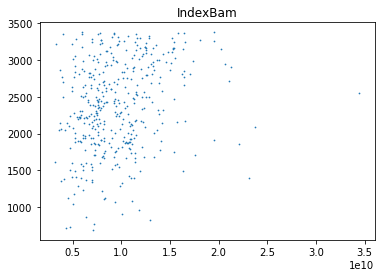

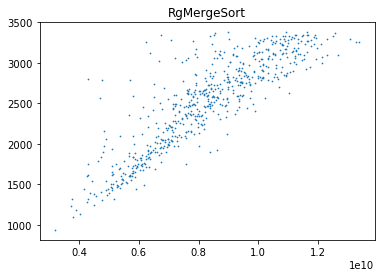

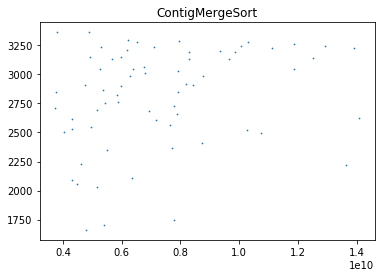

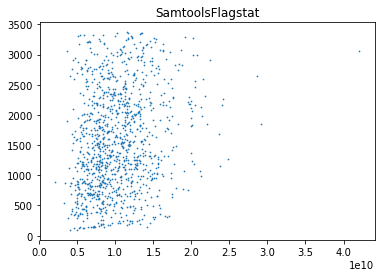

In [35]:
low_jobs=job_data[job_data.duration.mean()-job_data.duration>=(.31*job_data.duration.std())]
for k in tools:
    correct = low_jobs[low_jobs.tool==k].dropna(axis=0,how='any')
    correct = correct[correct.success==True]
    
    if correct.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(correct.sizes,correct.duration,s=.5)

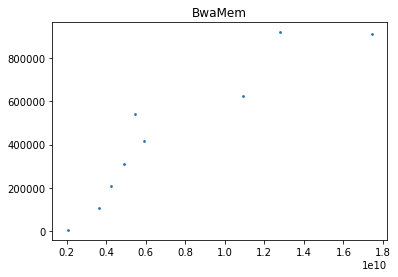

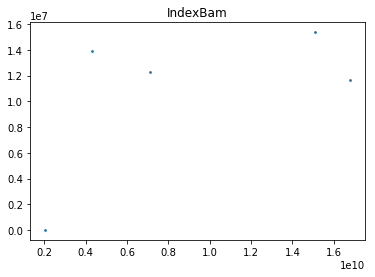

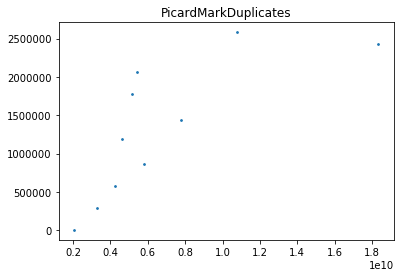

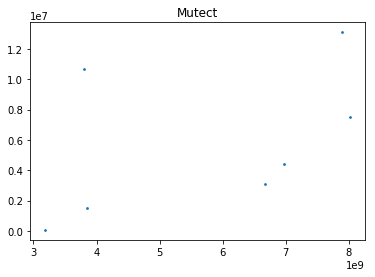

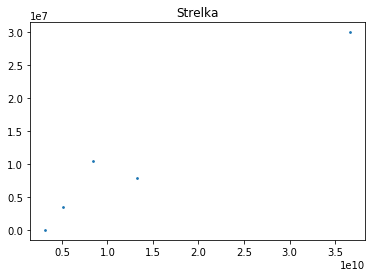

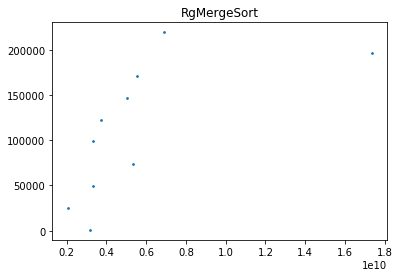

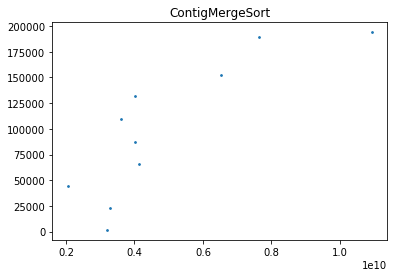

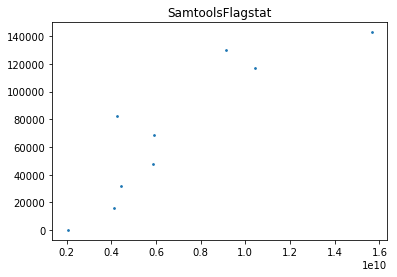

In [36]:
for k in tools:
    correct = job_data[job_data.tool==k].dropna(axis=0,how='any')
    binned = np.linspace(correct.duration.min(),correct.duration.max(),10)
    groups = correct.groupby(np.digitize(correct.duration,binned))
    
    data = groups.min()
    if data.duration.size!=0:
        plt.figure()
        plt.title(k)
        plt.scatter(data.sizes,data.duration,s=3)

BwaMem


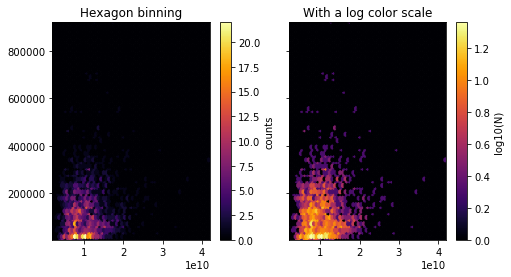

IndexBam


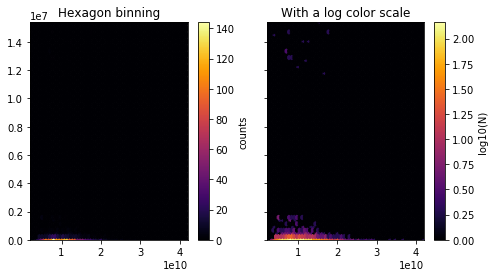

PicardMarkDuplicates


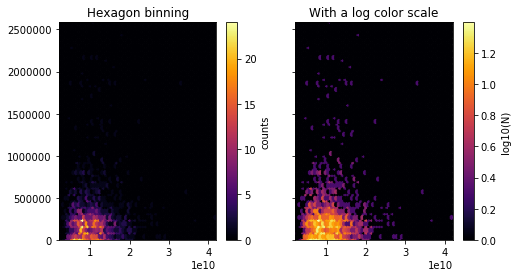

Mutect


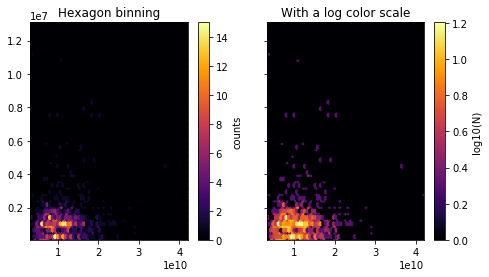

Strelka


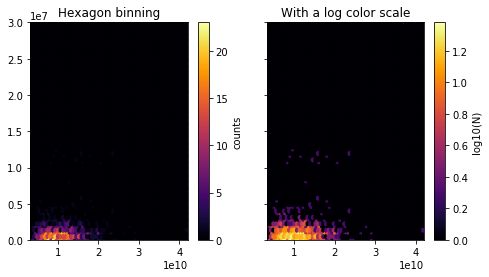

RgMergeSort


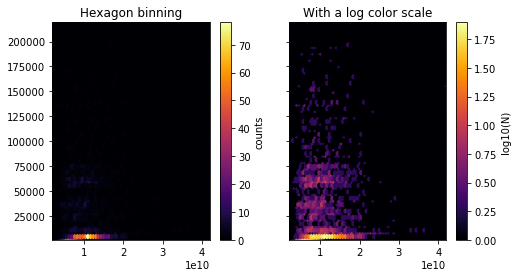

ContigMergeSort


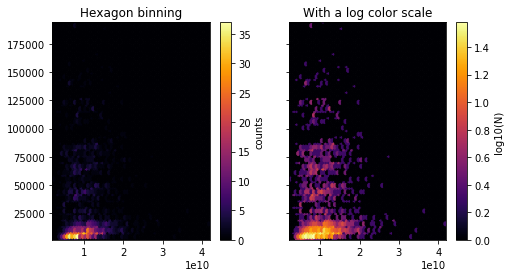

SamtoolsFlagstat


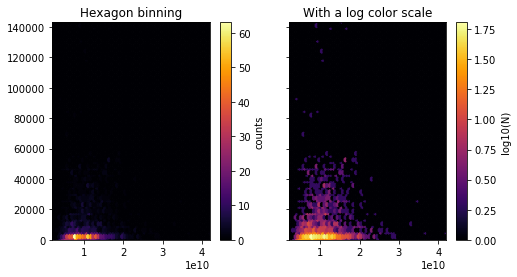

In [37]:
for k in tools:
    current = job_data[job_data.tool==k].dropna(axis=0, how='any')
    if len(current.duration.tolist())>0:
        x = current.sizes.tolist()
        y = current.duration.tolist()
        xmin = min(x)
        xmax = max(x)
        ymin = min(y)
        ymax = max(y)

        fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
        fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
        ax = axs[0]
        hb = ax.hexbin(x, y, gridsize=60, cmap='inferno')
        print(k)
        ax.axis([xmin, xmax, ymin, ymax])
        ax.set_title("Hexagon binning")
        cb = fig.colorbar(hb, ax=ax)
        cb.set_label('counts')

        ax = axs[1]
        hb = ax.hexbin(x, y, gridsize=60, bins='log', cmap='inferno')
        ax.axis([xmin, xmax, ymin, ymax])
        ax.set_title("With a log color scale")
        cb = fig.colorbar(hb, ax=ax)
        cb.set_label('log10(N)')

        plt.show()


BwaMem


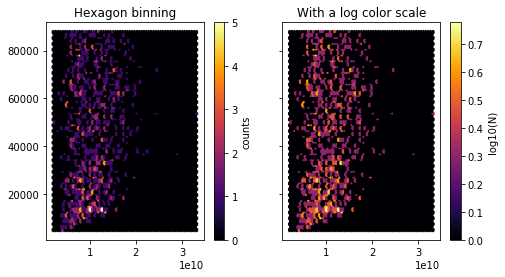

PicardMarkDuplicates


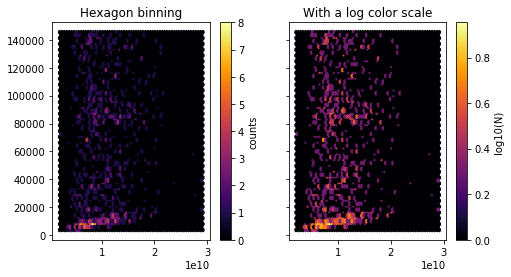

Mutect


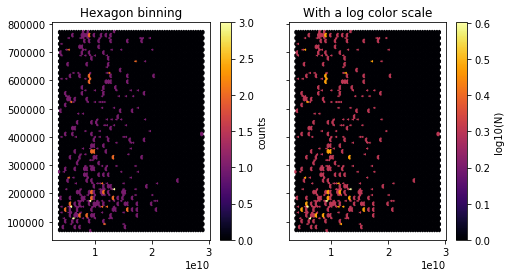

Strelka


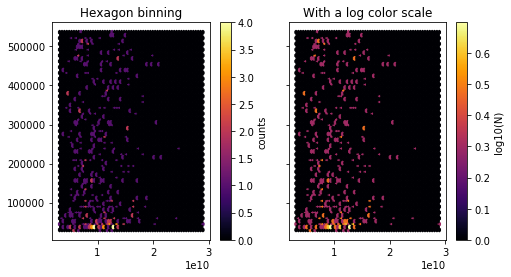

RgMergeSort


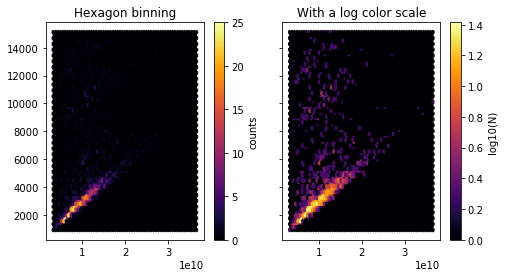

ContigMergeSort


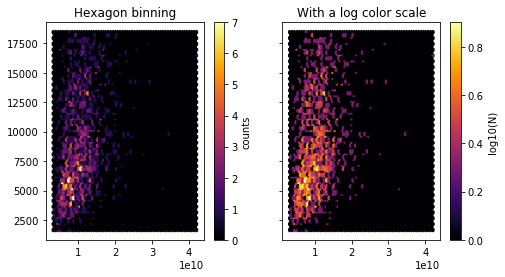

SamtoolsFlagstat


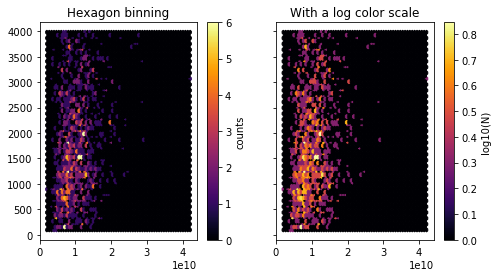

In [45]:
for k in tools:
    current = job_data[job_data.tool==k].dropna(axis=0, how='any')
    current = current[(current.duration.mean()-current.duration)>=(.33*current.duration.std())]
    if len(current.duration.tolist())>0:
        x = current.sizes.tolist()
        y = current.duration.tolist()
        xmin = min(x)
        xmax = max(x)
        ymin = min(y)
        ymax = max(y)

        fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
        fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
        ax = axs[0]
        hb = ax.hexbin(x, y, gridsize=60, cmap='inferno')
        print(k)
        #ax.axis([xmin, xmax, ymin, ymax])
        ax.set_title("Hexagon binning")
        cb = fig.colorbar(hb, ax=ax)
        cb.set_label('counts')

        ax = axs[1]
        hb = ax.hexbin(x, y, gridsize=60, bins='log', cmap='inferno')
        #ax.axis([xmin, xmax, ymin, ymax])
        ax.set_title("With a log color scale")
        cb = fig.colorbar(hb, ax=ax)
        cb.set_label('log10(N)')

        plt.show()